# Resolution Convolution (SMA) Example

In [1]:
%matplotlib inline
import numpy as np
from neutronpy import Instrument, Sample
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
import neutronpy as npy

print('matplotlib version: ', mpl.__version__)
print('numpy version: ', np.__version__)
print('neutronpy version: ', npy.__version__)

matplotlib version:  2.0.0
numpy version:  1.12.1
neutronpy version:  1.0.3


In [3]:
def dispersion(p, h, k, l):
    '''Returns energy of peak for given HKL'''
    return p[0] / np.sqrt(2.) * np.sqrt(3. - np.cos(2. * np.pi * h) - np.cos(2. * np.pi * k) - np.cos(2. * np.pi * l)) 

def sqw1(H, K, L, p):
    '''Calculated S(Q,w)'''
    w0 = dispersion(p, H, K, L)  # Dispersion given HKL

    bf = 1. / (1. - np.exp(-w0 / (0.086173 * 300)))  # Bose factor @ 300 K
    S = 1. / w0 * bf  # Intensity of dispersion

    HWHM = np.zeros(H.shape)  # HWHM (intrinsic energy width)

    w0 = w0[np.newaxis, ...]  # -> Column vector    
    S = S[np.newaxis, ...]  # -> Column vector
    HWHM = HWHM[np.newaxis, ...]  # -> Column vector

    return [w0, S, HWHM]

def pref1(H, K, L, W, EXP, p):
    '''Prefactor (constant multiplier, if you want background, 
       return it as second output arg e.g.[pref, bg]) and set nargout=2 
       in convolution call'''
    return np.ones(H.shape)[np.newaxis, ...]

In [4]:
sample = Sample(4., 4., 4., 90, 90, 90, mosaic=60., u=[1, 0, 0], v=[0, 1, 0])

instr = Instrument(efixed=14.7, sample=sample, hcol=[50, 80, 50, 120], ana='PG(002)', mono='PG(002)', 
                   moncor=1, mono_mosaic=35., ana_mosaic=35.)

instr.mono.dir = 1
instr.sample.dir = -1
instr.ana.dir = 1

In [5]:
eValues = np.arange(0., 15., 0.03)
H = 2. * np.ones(eValues.shape)  # H=2
K = -0.18 * np.ones(eValues.shape)  # K=-0.18
L = np.zeros(eValues.shape)  # L=0

q = np.array([H, K, L, eValues])  # q = [2, -0.18, 0, eValues]

In [6]:
output_fix = instr.resolution_convolution_SMA(sqw1, pref1, 1, q, METHOD='fix', ACCURACY=[5,5], p=[15])  # Fixed sample method

output_mc = instr.resolution_convolution_SMA(sqw1, pref1, 1, q, METHOD='mc', ACCURACY=[5], p=[15])  # Monte Carlo Method

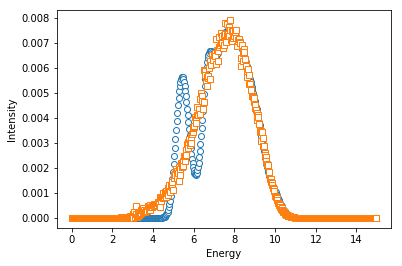

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(eValues, output_fix, 'o', mfc='w')
ax.plot(eValues, output_mc, 's', mfc='w')

ax.set_xlabel('Energy')
ax.set_ylabel('Intensity')